Hunter Bennett  
Glass Lab
________
Python visualization and analysis of clustering from 180117 WGCNA analysis run

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import subprocess
import os
import sys
import glob
import re
from sklearn.decomposition import PCA

# import user defined packages
sys.path.insert(0, '/home/h1bennet/scripts')
import hbUtils

# plot matplotlib plots in notebook
%matplotlib inline

In [2]:
# define path to data
wgcna_path = '/home/h1bennet/liverStrains/results/180117_WGCNA/'

# define output directory
outdir = '/home/h1bennet/liverStrains/results/180123_WGCNA/'

if not os.path.isdir(outdir):
    subprocess.call(['mkdir', '-p', outdir])
    
color_dict = {'aj-control':'#fb9a99', 'aj-amln':'#e31a1c',
              'balbc-control':'#a6cee3', 'balbc-amln':'#1f78b4',
              'ncorwt-control':'#b2df8a', 'ncorwt-amln':'#33a02c'}

Load in the data from WGCNA

In [14]:
clinData = pd.read_csv('/home/h1bennet/liverStrains/results/180111_RNA_Seq/amln_samples.txt', sep='\t').iloc[:, 1:]
clinData = clinData.loc[clinData.sample_type=='kupffer', :]
rpkm = pd.read_csv(wgcna_path + 'wgcna_rpkm.txt', sep='\t')
eigen = pd.read_csv(wgcna_path + 'wgcna_module_eigengenes.txt', sep='\t')
eigen_rd = pd.read_csv(wgcna_path + 'wgcna_module_eigengenes_respect_dendro.txt', sep='\t')
module_colors = pd.read_csv(wgcna_path + 'wgcna_module_colors.txt', sep='\t')
module_colors_rd = pd.read_csv(wgcna_path + 'wgcna_module_colors_respect_dendro.txt', sep='\t')

First lets make the scatter plots of module eigengenes

In [4]:
eigen['group'] = clinData.group
eigen_melt = pd.melt(eigen, id_vars='group')

eigen_rd['group'] = clinData.group
eigen_rd_melt = pd.melt(eigen_rd, id_vars='group')

### Scatter for the "respect dendrogram" version of the tree cut 

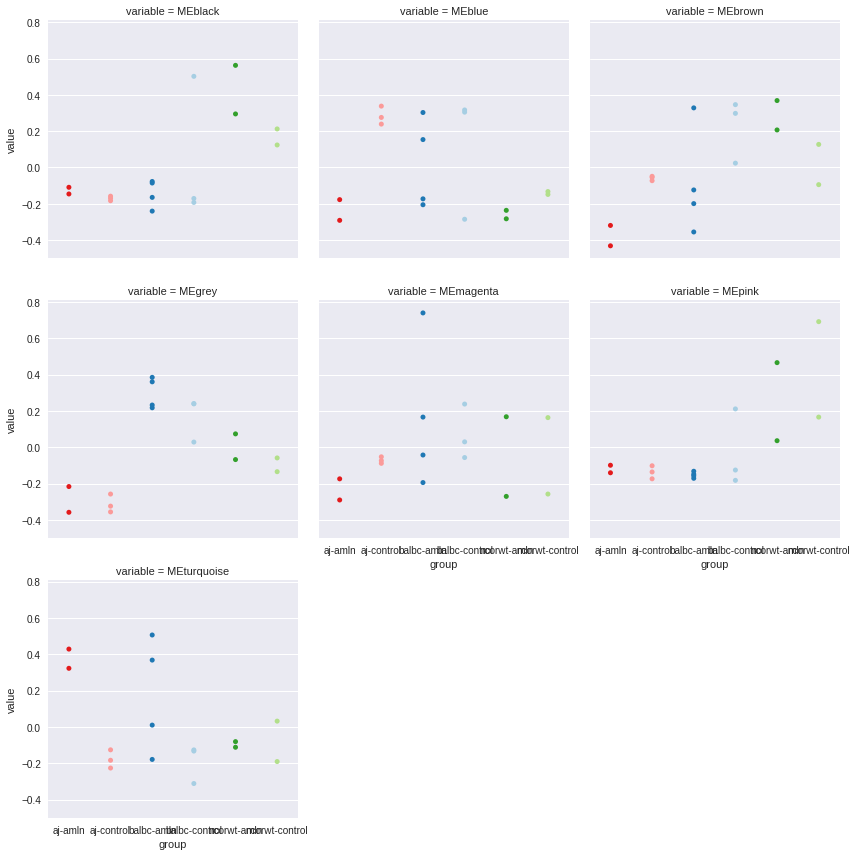

In [38]:
g = sns.factorplot(x='group', y='value',
                   col='variable', hue='group',
                   palette=color_dict, data=eigen_rd_melt,
                   kind='strip', col_wrap=3)

### Scatter for the non "respect dendrogram" version of the tree cut 

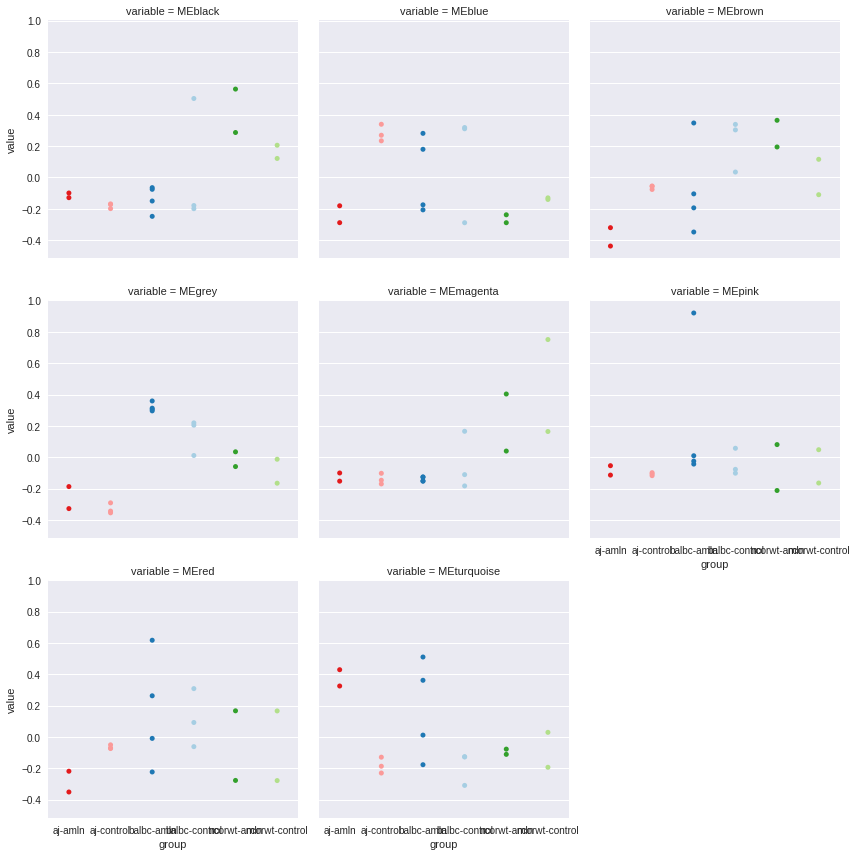

In [40]:
g = sns.factorplot(x='group', y='value',
                   col='variable', hue='group',
                   palette=color_dict, data=eigen_melt,
                   kind='strip', col_wrap=3)

### Lets check the gene expression levels amongst the modules

In [5]:
rpkm_colors = np.log2(rpkm.T + 1)
rpkm_colors['colors'] = list(module_colors.x)
rpkm_colors['colorsRD'] = list(module_colors_rd.x)

In [6]:
rpkm_colors.head()

,aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3A_JSSTDT_16_09_26,aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3B_JSSTDT_16_09_26,aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3c_JSS_TDT_16_09_28,aj_KupfferTotal_RNA_polyA_ControlDiet_30week_AJ1c_JSS_TDT_16_09_28,aj_KupfferTotal_RNA_polyA_ControlDiet_30week_AJ1d_JSS_TDT_16_09_28,balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3a_JSS_TDT_16_09_28,balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3B_JSSTDT_16_09_26,balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3C_JSSTDT_16_09_26,balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3d_JSS_TDT_16_09_28,balbc_KupfferTotal_RNA_polyA_ControlDiet_30week_Balb1c_JSS_TDT_16_09_28,balbc_KupfferTotal_RNA_polyA_ControlDiet_30week_Balb1d_JSS_TDT_16_09_28,NCoRWT_KupfferTotal_RNA_polyA_AMLNDiet_30week_LN136C_JSS_TDT_16_09_19,NCoRWT_KupfferTotal_RNA_polyA_AMLNDiet_30week_LN141A_JSS_TDT_16_09_21,NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134B_JSS_TDT_16_09_21,NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134C_JSS_TDT_16_09_19,NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134D_JSS_TDT_16_09_21,colors,colorsRD
NM_001166375,5.980437,5.839103,5.103372,4.875583,5.175165,4.254821,5.892270,5.519007,5.104546,4.712926,4.581472,4.956847,4.502840,4.934517,4.963335,4.868835,turquoise,turquoise
NM_013933,6.203123,6.042360,4.922341,5.379864,4.842828,5.452167,5.990819,6.117217,5.494000,4.676944,5.262208,5.227510,5.479166,5.299098,5.544207,4.913990,turquoise,turquoise
NM_007760,4.091361,4.235650,4.502267,4.625037,4.658611,4.226894,3.833497,4.036679,4.265737,4.362049,4.311358,4.176642,3.951588,4.219478,3.900336,4.160840,blue,blue
NM_018773,5.983997,6.070819,5.870291,5.548313,5.559584,6.001870,6.257784,6.101860,5.813294,6.084936,5.810083,6.449743,6.379794,6.299556,6.097611,6.080146,blue,blue
NR_033145,1.092207,1.838347,2.013998,1.926759,2.310631,2.385707,1.588805,1.707525,1.898789,2.095924,1.577731,1.864731,2.011853,2.080317,1.556307,1.598365,brown,brown


In [7]:
rpkm_colors_melted = pd.melt(rpkm_colors, id_vars=['colors', 'colorsRD'])
rpkm_colors_melted_id = pd.merge(rpkm_colors_melted,
                                 clinData.loc[:, ['subject', 'group']],
                                 how='left', left_on='variable',
                                 right_on='subject')
rpkm_colors_melted_id = rpkm_colors_melted_id.drop('variable', axis=1)

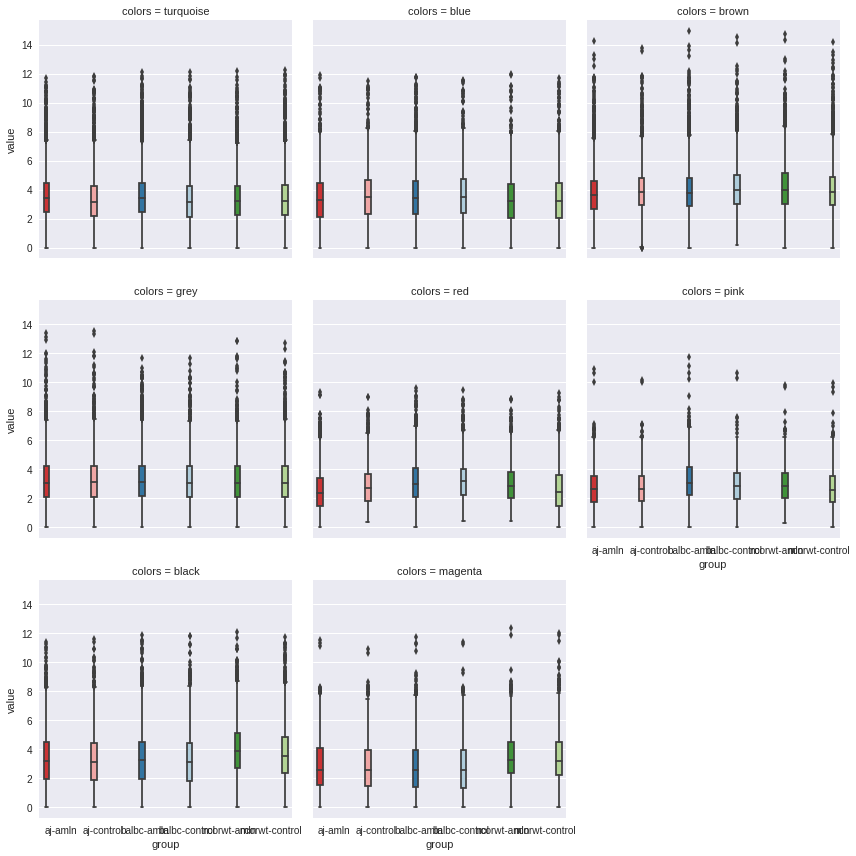

In [84]:
g = sns.factorplot(x='group', y='value',
                   col='colors', hue='group',
                   palette=color_dict,
                   data=rpkm_colors_melted_id,
                   kind='box', col_wrap=3)

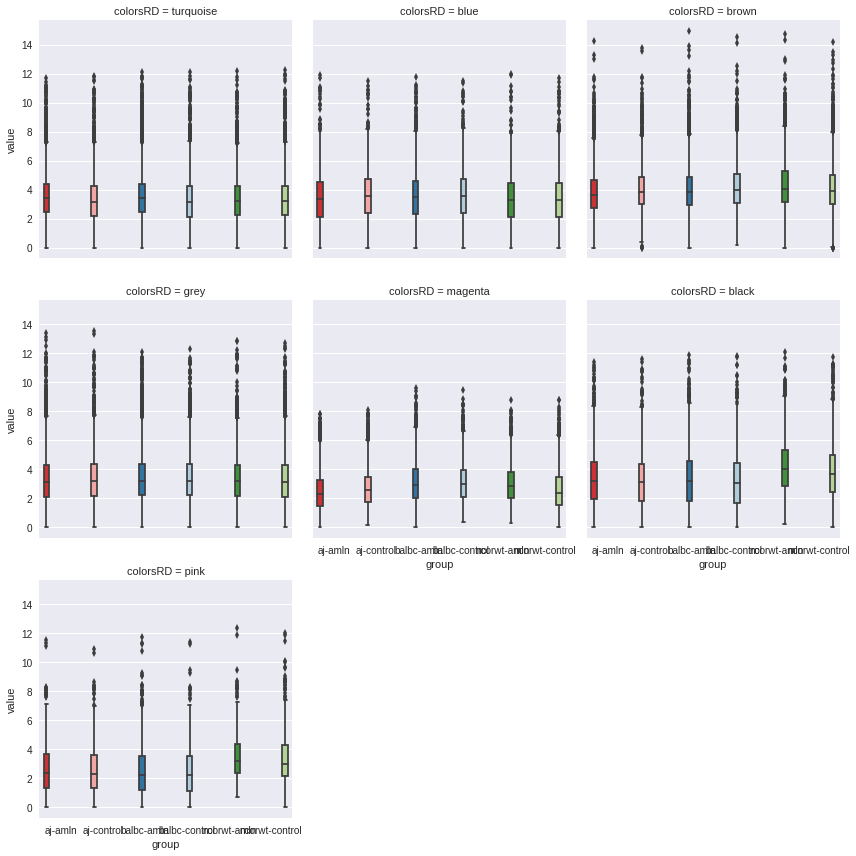

In [85]:
g = sns.factorplot(x='group', y='value',
                   col='colorsRD', hue='group',
                   palette=color_dict,
                   data=rpkm_colors_melted_id,
                   kind='box', col_wrap=3)

Lets try and re-run the heatmap that we did in R with seaborn

In [15]:
(rpkm_colors_sorted.iloc[:, :-2]).shape

(10946, 16)

In [17]:
clinData.shape

(16, 10)

### Looking at these heatmaps I'm worried that we do not have significant enough differences between our samples to pick up real differential clusters. Not many other options for TOM matrix other than using unsigned networks, perhaps 'mean' function would improve performance but i'm not sure.

/home/h1bennet/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


1 loop, best of 3: 7min 2s per loop


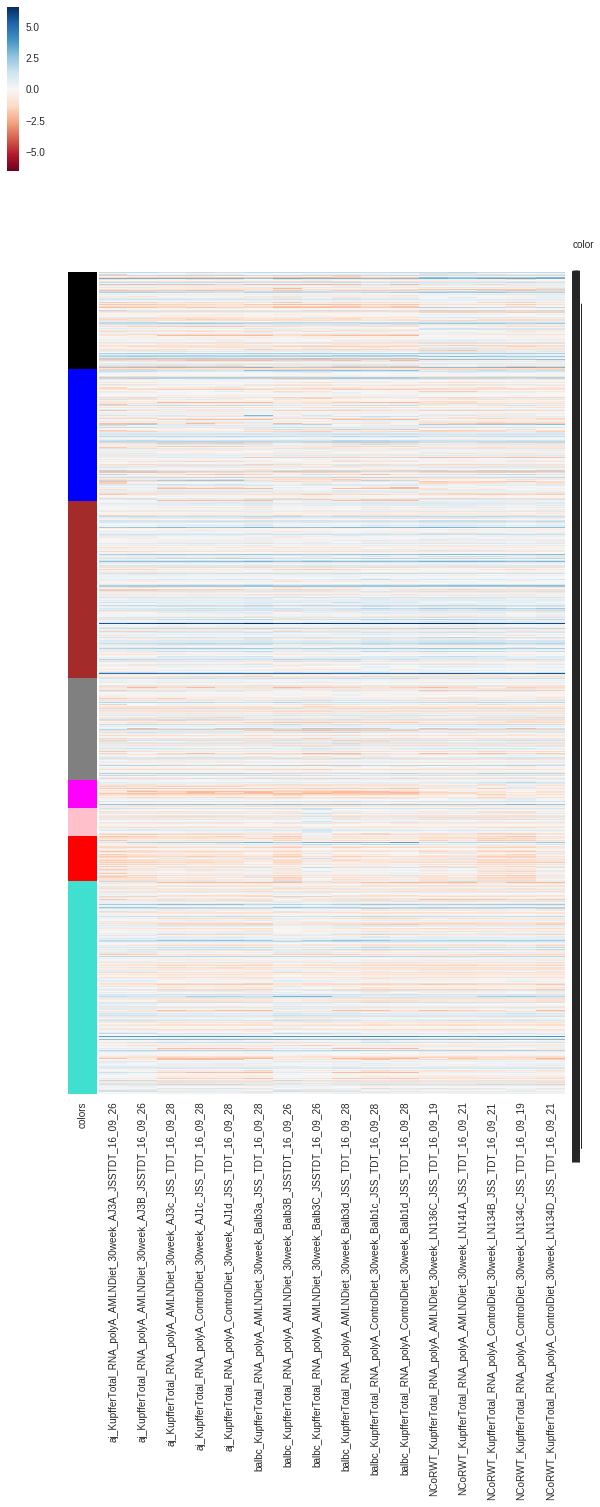

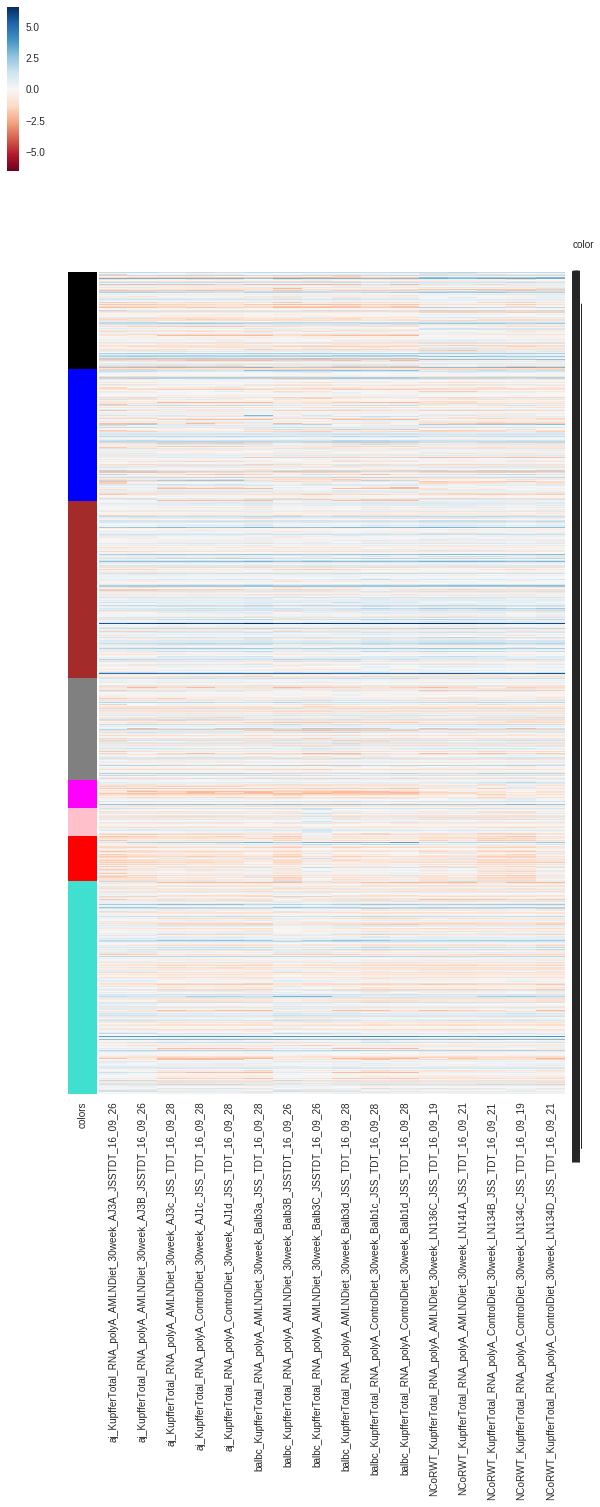

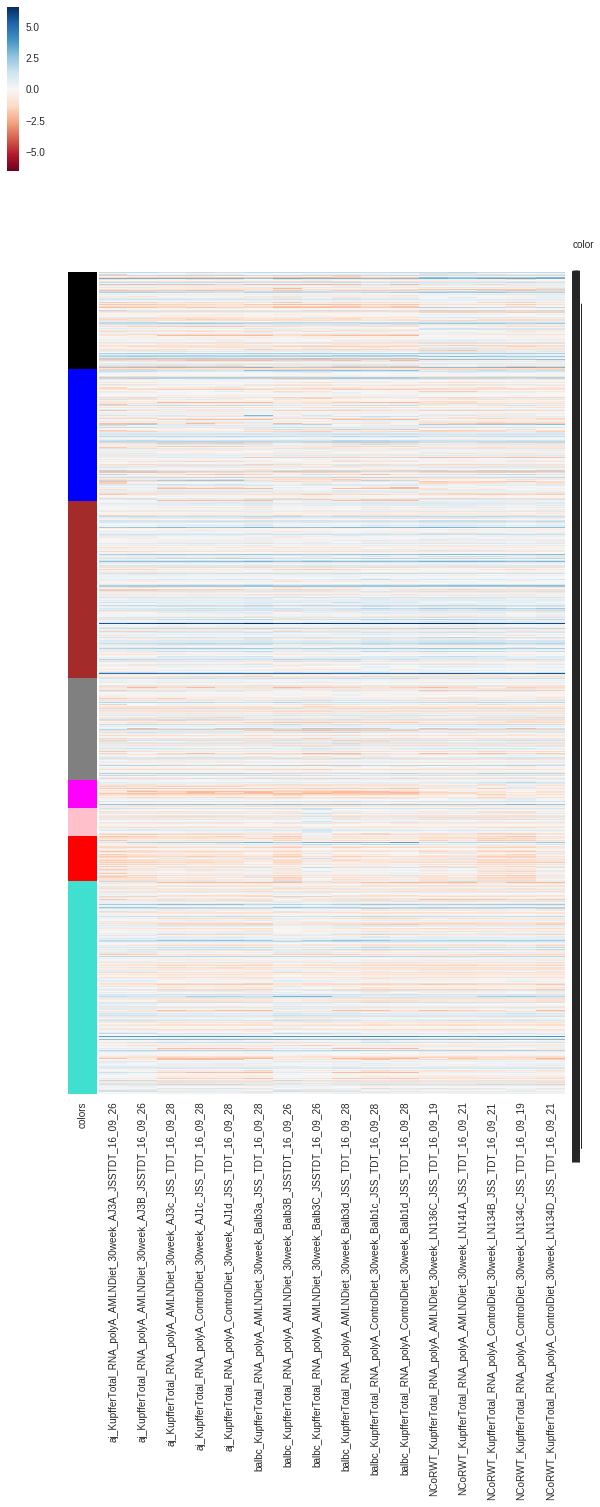

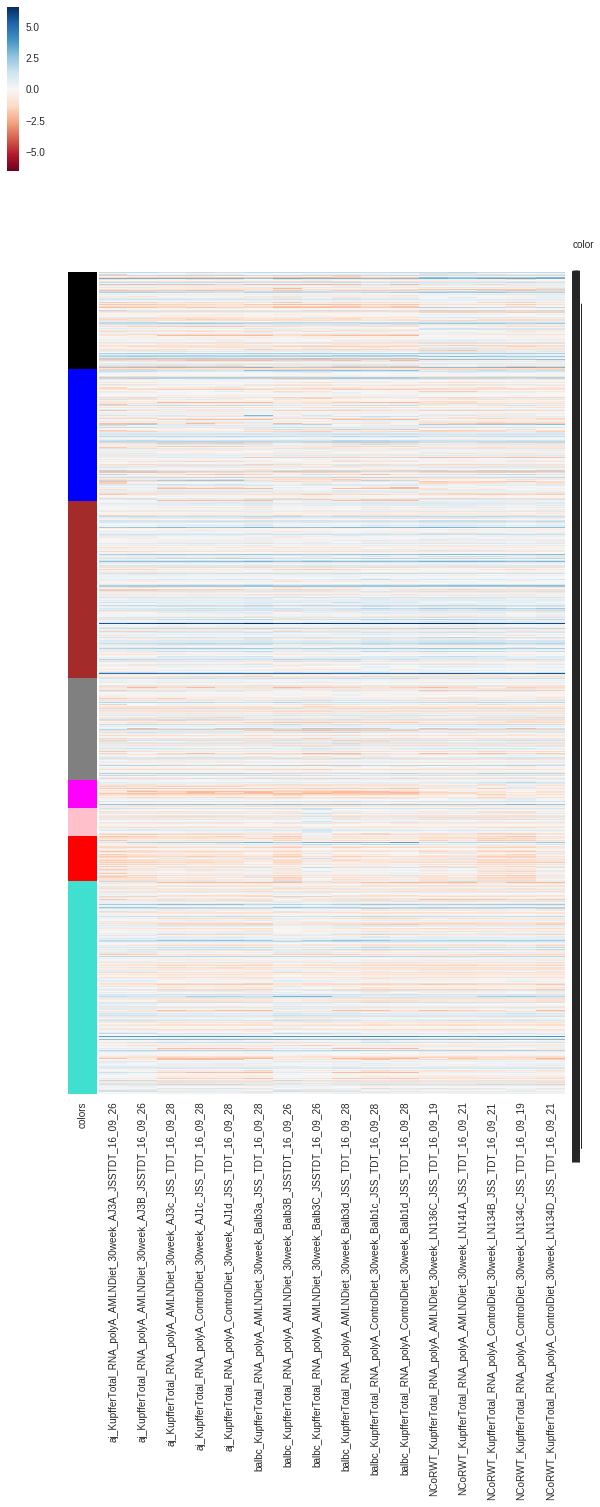

In [18]:
%%timeit
rpkm_colors_sorted = rpkm_colors.sort_values(by='colors')

sns.clustermap(rpkm_colors_sorted.iloc[:, :-2], z_score=True,
               row_colors = rpkm_colors_sorted['colors'],
               col_colors = clinData.color,
               row_cluster=False, col_cluster=False,
               cmap='RdBu', figsize=(10, 20))
            

/home/h1bennet/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


1 loop, best of 3: 7min 4s per loop


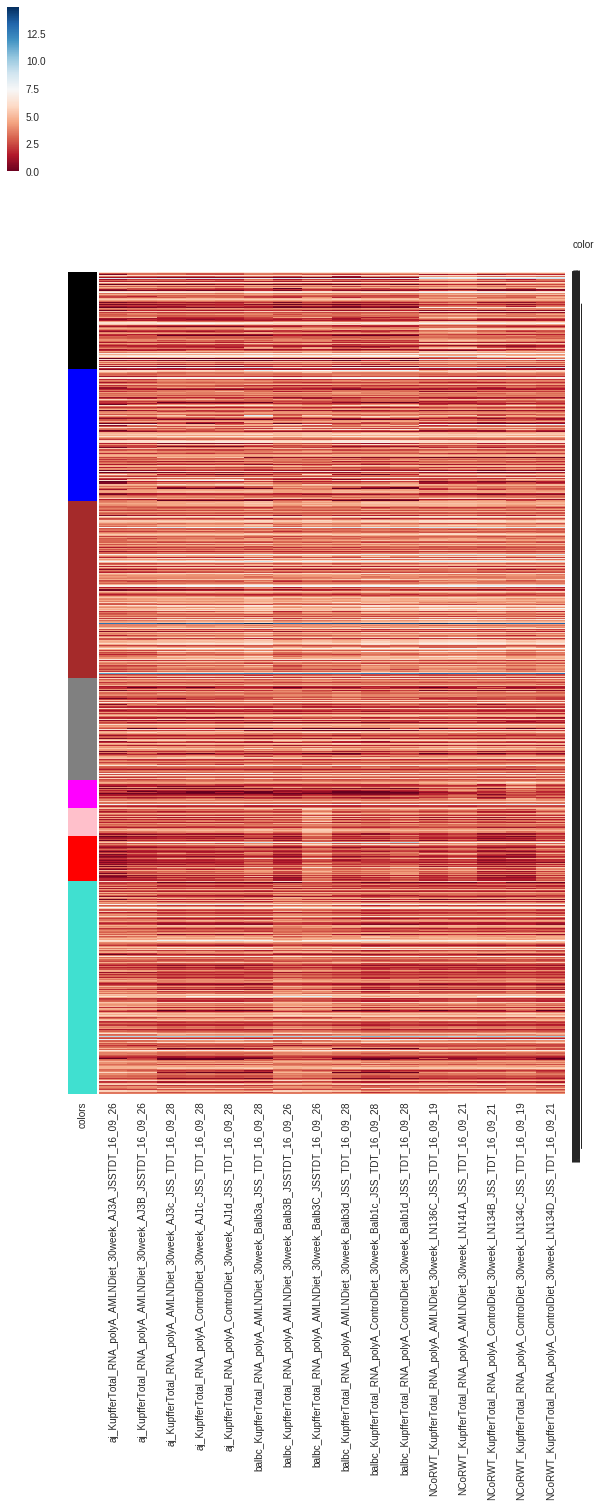

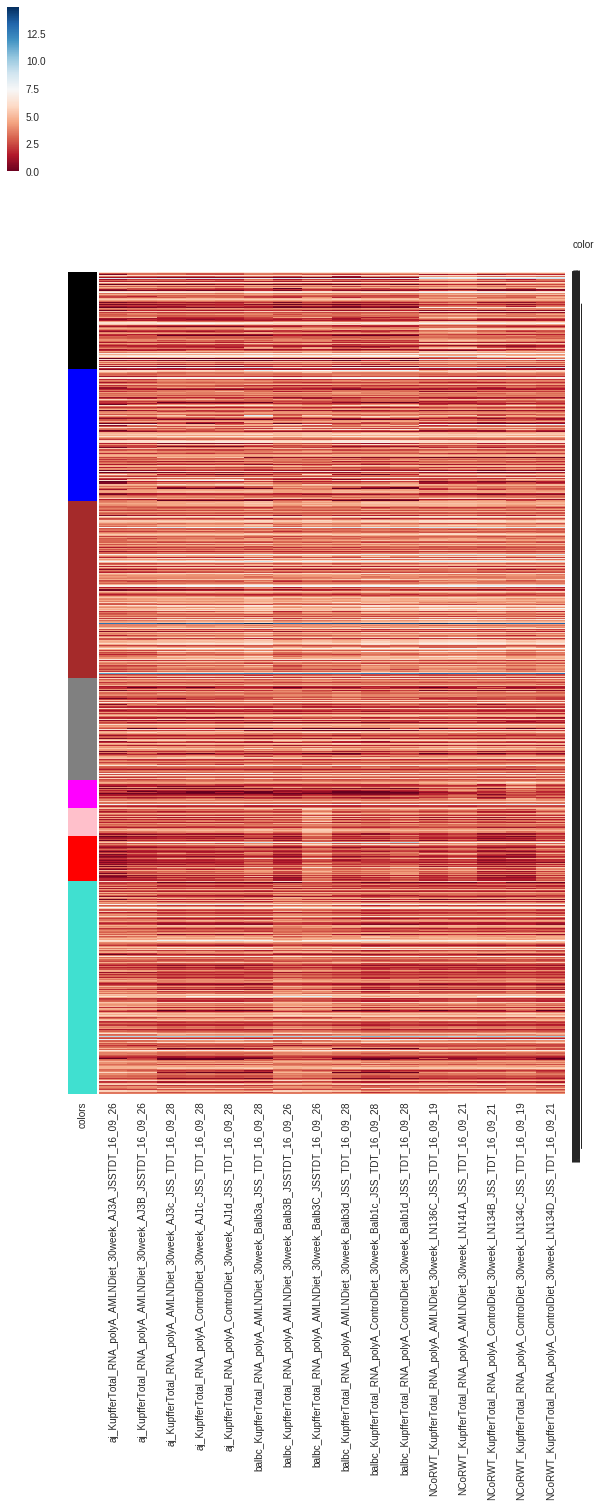

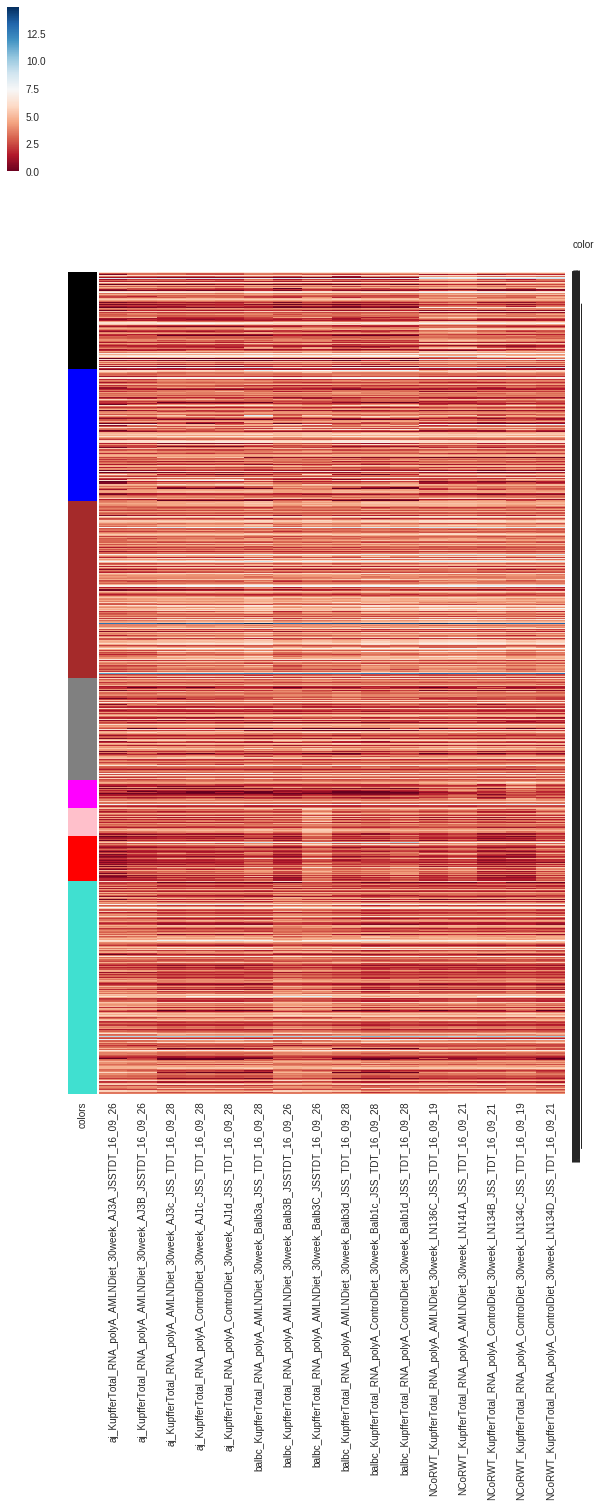

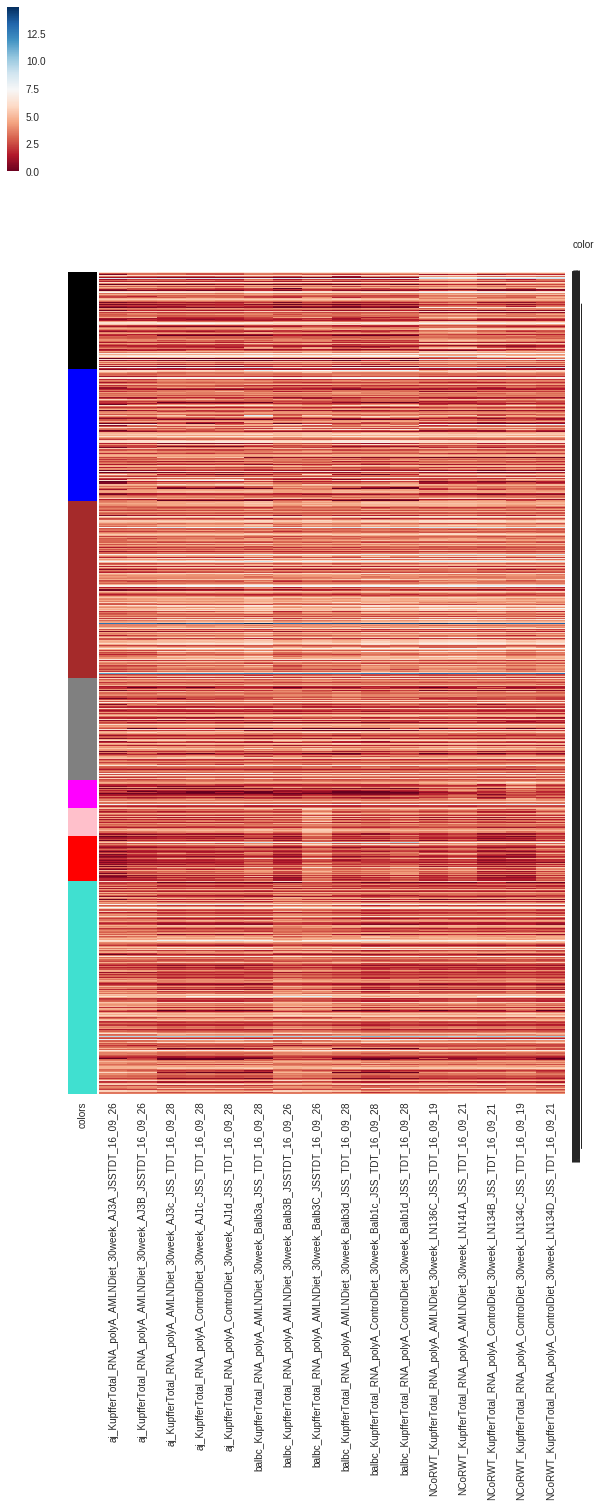

In [19]:
%%timeit
rpkm_colors_sorted = rpkm_colors.sort_values(by='colors')

sns.clustermap(rpkm_colors_sorted.iloc[:, :-2],
               row_colors = rpkm_colors_sorted['colors'],
               col_colors = clinData.color,
               row_cluster=False, col_cluster=False,
               cmap='RdBu', figsize=(10, 20))